In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df_model_L = pd.read_csv('./RESULTS training/results L.csv')
df_model_S = pd.read_csv('./RESULTS training/results S.csv')

df_model_L.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.060669,0.075549,0,0.29883,0.30992,0.21095,0.068608,0.014679,0.017303,0,0.003331,0.003331,0.070016
1,1,0.043936,0.057367,0,0.62916,0.69916,0.64929,0.238750,0.011170,0.011223,0,0.006518,0.006518,0.039869
2,2,0.039459,0.049717,0,0.92320,0.70185,0.82958,0.379350,0.010717,0.008501,0,0.009139,0.009139,0.009157
3,3,0.034602,0.046735,0,0.91556,0.82924,0.89010,0.442040,0.008721,0.007585,0,0.008145,0.008145,0.008145
4,4,0.032071,0.044724,0,0.92818,0.84840,0.91771,0.462010,0.008572,0.007198,0,0.008145,0.008145,0.008145


In [36]:
df_model_L.rename(columns={'               epoch': 'epoch'}, inplace=True)
df_model_S.rename(columns={'               epoch': 'epoch'}, inplace=True)

#print(df_model_L.columns)

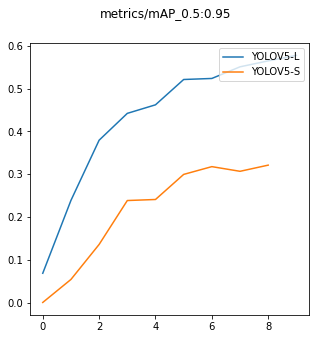

In [41]:
fig, axs = plt.subplots(figsize=(5, 5))
fig.suptitle('metrics/mAP_0.5:0.95')
axs.plot(df_model_L["epoch"], df_model_L["metrics/mAP_0.5:0.95"])
axs.plot(df_model_S["epoch"], df_model_S["metrics/mAP_0.5:0.95"])
axs.legend(["YOLOV5-L","YOLOV5-S"],loc="upper right")
x=df_model_L["epoch"]
#axs.set_xticks(np.arange(min(x), max(x)+1, 1))